# Genetic diversity (mitochondria)

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import os
import warnings
from matplotlib import rc
import networkx as nx
import matplotlib.colors as mcolors
from matplotlib.offsetbox import AnchoredText
warnings.simplefilter('ignore')
plt.rcParams['mathtext.fontset'] = 'cm'
import matplotlib.patches as mpatches

In [2]:
font = {'family':'sans-serif','weight':'regular', 'style':'normal','size':18,'sans-serif':['Trebuchet MS'] }
rc('font', **font)
rc('text', usetex=True) 
plt.rcParams['text.latex.preamble'] = [
       r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
       r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
       r'\usepackage{helvet}',    # set the normal font here
       r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
]
plt.rcParams['legend.title_fontsize'] = 18

gen=2000; TT=np.linspace(2,gen,int(gen-1),dtype=int); runs=50
labels = ['uncoupled', 's_175', 's_125', 's_075','s_025']
labels2 = [r'$NI$',r'$\sigma_w=0.175$',r'$\sigma_w=0.125$', r'$\sigma_w=0.075$',r'$\sigma_w=0.025$']
labels3 = [r'$NI$',r'$0.175$',r'$0.125$', r'$0.075$',r'$0.025$']
colorlist=['r','m','tab:orange','g','b']
# colorlist=['r','#ff00cc','tab:orange','g','b']
case=[x for x in labels]

In [3]:
dintra_all = [[0]]*len(case); abintra_all = [[0]]*len(case);

## Intraspecies distances
for c in range(len(case)):
    path = "./"+case[c]
    sp_index=[]; abintra=[]; ndist_intra=[];
    for i in range(runs):
        counter=str(i+1).zfill(2)
        arr_txt = path+'/'+[x for x in os.listdir(path) if x.startswith("run_"+counter)][-1]       

        y = [x for x in os.listdir("./"+arr_txt) if x.endswith("mito_dist_intra.dat")][0]
        inp = open (arr_txt+'/'+y)
        for line in inp.readlines():
            p=line.split()
            sp_index.append(int(p[0]))
            abintra.append(int(p[1]))
            ndist_intra.append(int(p[2]))
        inp.close()
    abintra_all[c]=abintra
    dintra_all[c]=ndist_intra


In [4]:
dinter_all = [[0]]*len(case); ab1_all = [[0]]*len(case); ab2_all = [[0]]*len(case); abund_all = [[0]]*len(case)

## Interspecies distances
for c in range(len(case)):
    path = "./"+case[c]
    abund_aux = [];
    ndist_inter=[]
    ab1=[]; ab2=[]
    for i in range(runs):
        temp=[]
        counter=str(i+1).zfill(2)
        arr_txt = path+'/'+[x for x in os.listdir(path) if x.startswith("run_"+counter)][-1]       
        y = [x for x in os.listdir("./"+arr_txt) if x.endswith("abund0.dat")][0]
        inp = open (arr_txt+'/'+y)
        for line in inp.readlines():
            p=line.split()
            abund_aux.append(int(p[0]))
            temp.append(int(p[0]))
        inp.close()
        
        y = [x for x in os.listdir("./"+arr_txt) if x.endswith("mito_dist_sp.dat")][0]
        inp = open (arr_txt+'/'+y)
        for line in inp.readlines():
            p=line.split()
            x1=int(p[0]); x2=int(p[1])
            ndist_inter.append(int(p[2]))
            ab1.append(temp[x1-1]); ab2.append(temp[x2-1])
        inp.close()
        
    dinter_all[c]=ndist_inter
    ab1_all[c]=ab1
    ab2_all[c]=ab2
    abund_all[c]=abund_aux

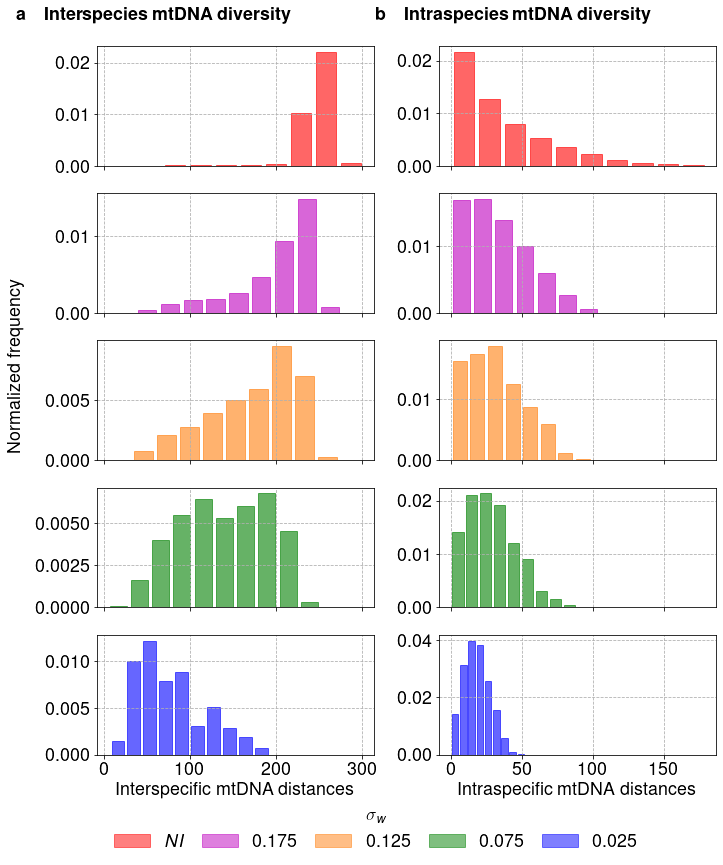

In [5]:
fig, ax = plt.subplots(len(case),2,figsize=(10,12),sharex='col')
box=[]
for c in range(len(case)): 
    ax[c][0].hist(dinter_all[c],color=colorlist[c],histtype='barstacked', label=labels2[c], alpha=0.6,rwidth=0.8,edgecolor = colorlist[c],density=True)
    ax[c][1].hist(dintra_all[c],color=colorlist[c],histtype='barstacked',label=labels2[c], alpha=0.6,rwidth=0.8,edgecolor = colorlist[c],density=True)
    ax[c][0].grid(linestyle='--')
    ax[c][1].grid(linestyle='--')
    box.append(mpatches.Patch(color=colorlist[c],alpha=0.5,edgecolor = colorlist[c],label=labels3[c]))
#     ax[c][1].set_xlim([0, 600])
fig.patch.set_facecolor('xkcd:white')
fig.tight_layout()
fig.text(0, 0.9, r"$\bf{a \quad Interspecies \: mtDNA \: diversity}$ ")
fig.text(0.5, 0.9, r"$\bf{b \quad Intraspecies \: mtDNA \: diversity}$ ")
ax[c][0].set_xlabel('Interspecific mtDNA distances')
ax[c][1].set_xlabel('Intraspecific mtDNA distances')
legend=fig.legend(handles=box, loc="lower center", bbox_to_anchor=(0.5, -0.08),ncol=5,title=r'$\sigma_w$', frameon=False,columnspacing=1)
fig.text(0, 0.5, 'Normalized frequency', ha='center', va='center', rotation='vertical')
fig.subplots_adjust(top=0.87)
fig.savefig('./Figuras/mtdna_supp.pdf',transparent=True,bbox_inches='tight')
plt.show()